In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import  accuracy_score, confusion_matrix, precision_recall_fscore_support
from sklearn import metrics
import warnings # to hide unnecesary warning
warnings.filterwarnings('ignore')                                                            
%matplotlib inline
# Import the DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
#import NB classifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
#import KNN classifier
from sklearn.neighbors import KNeighborsClassifier
#import svm classifier
from sklearn.svm import SVC

#import roc-auc 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [17]:

from IPython.display import display
# Importing dataset', '
train = pd.read_csv("tae.csv").sample(n=80,replace=False)


test = pd.read_csv("tae.csv").sample(n=40,replace=False)
# see some of it, their overall statistics and dimensions
display(train.head(5))
display(train.describe())
display(train.shape)

,Native Speaker,Course instructor,Course,Semesterr,Class Size,Class
76,2,5,2,2,48,1
131,1,17,18,2,44,2
26,2,8,3,2,24,2
16,2,7,11,2,10,2
10,2,10,22,2,9,3


,Native Speaker,Course instructor,Course,Semesterr,Class Size,Class
count,80.000000,80.000000,80.000000,80.000000,80.00000,80.000000
mean,1.850000,13.187500,8.212500,1.862500,27.51250,1.887500
std,0.359324,6.378551,7.134679,0.346547,12.69306,0.826672
min,1.000000,1.000000,1.000000,1.000000,3.00000,1.000000
25%,2.000000,8.750000,3.000000,2.000000,19.00000,1.000000
50%,2.000000,13.500000,5.000000,2.000000,25.50000,2.000000
75%,2.000000,18.000000,15.000000,2.000000,37.00000,3.000000
max,2.000000,25.000000,25.000000,2.000000,66.00000,3.000000


(80, 6)

In [18]:
x_train=train.iloc[:,:-1]
y_train=train.iloc[:,5]
x_test=test.iloc[:,:-1]
y_test=test.iloc[:,5]

In [19]:
svcGrid= SVC(random_state = 0, C=50, kernel='rbf', gamma = 0.005,probability=True)
svcGrid.fit(x_train, y_train)

predict_svm = svcGrid.predict(x_test)
score1 = metrics.accuracy_score(y_test,predict_svm)


[[14  3  1]
 [ 4  2  2]
 [ 4  5  5]]


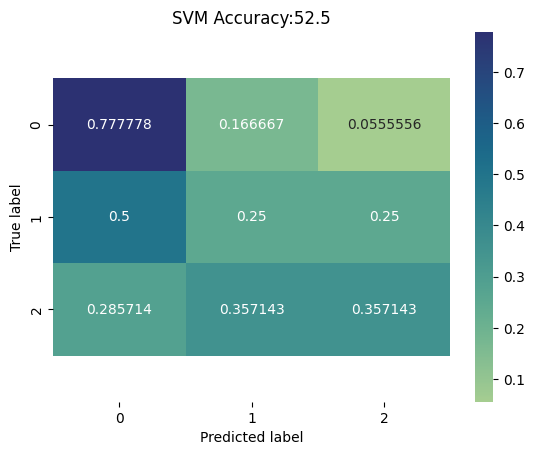

In [20]:
model_svm = SVC(random_state = 0, C=50, kernel='linear', gamma = 0.005,probability=True)
model_svm.fit(x_train, y_train)
y_pred = model_svm.predict(x_test)
conf_matrix_svm = confusion_matrix(y_test, y_pred)
print(conf_matrix_svm)
cm_normalized = conf_matrix_svm.astype('float') / conf_matrix_svm.sum(axis=1)[:, np.newaxis]

ax= sns.heatmap(cm_normalized, annot=True, fmt='g',cmap="crest")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title("SVM Accuracy:" + str(model_svm.score(x_test,y_test)*100))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.savefig('SVMconfusion_matrix.png')

In [21]:
#Define k-value
knn=KNeighborsClassifier(n_neighbors=19)
knn.fit(x_train,y_train)

#Estimate the accuracy of the classifier on test data
predict_knn=knn.predict(x_test)
score2 = metrics.accuracy_score(y_test,predict_knn)


In [22]:
# Instantiate the classifier
gnb = GaussianNB()

# Train classifier
gnb.fit(x_train,y_train)

# Test the classifier
predict_nb = gnb.predict(x_test)
score3 = metrics.accuracy_score(y_test,predict_nb)


In [23]:
# input the decision tree classifier using "entropy" & train the model
dtree = DecisionTreeClassifier(random_state = 0, criterion = 'entropy').fit(x_train, y_train)

# predict the classes of new, unseen data
predict_dtree = dtree.predict(x_test)
score4 = metrics.accuracy_score(y_test,predict_dtree)


In [24]:
##### Compare your results with at least one more algorithm using the same tae

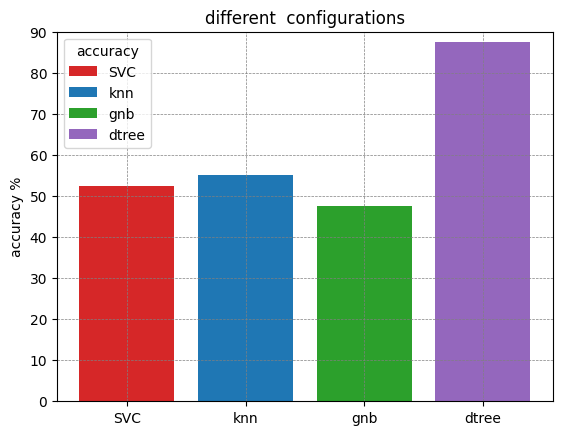

In [25]:
fig, ax = plt.subplots()

different = ['SVC', 'knn', 'gnb','dtree']
counts = [model_svm.score(x_test,y_test)*100 , score2*100 , score3*100 , score4*100]
bar_labels = ['SVC', 'knn', 'gnb','dtree']
bar_colors = ['tab:red', 'tab:blue', 'tab:green','tab:purple']

ax.bar(different, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('accuracy %')
ax.set_title('different  configurations')
ax.legend(title='accuracy')
plt.ylim(0,90)
plt.grid(color = 'grey',linestyle = '--', linewidth = 0.5)
plt.show()

In [26]:
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, predict_dtree, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, predict_nb, pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, predict_knn, pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, predict_svm, pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [27]:

auc_score1 = roc_auc_score(y_test, dtree.predict_proba(x_test),multi_class='ovr')
auc_score2 = roc_auc_score(y_test, gnb.predict_proba(x_test),multi_class='ovr')
auc_score3 = roc_auc_score(y_test, knn.predict_proba(x_test),multi_class='ovr')
auc_score4 = roc_auc_score(y_test, svcGrid.predict_proba(x_test),multi_class='ovr')

print(auc_score1, auc_score2, auc_score3, auc_score4)

0.9049648268398268 0.6918142621267621 0.59250703000703 0.23648775992525994


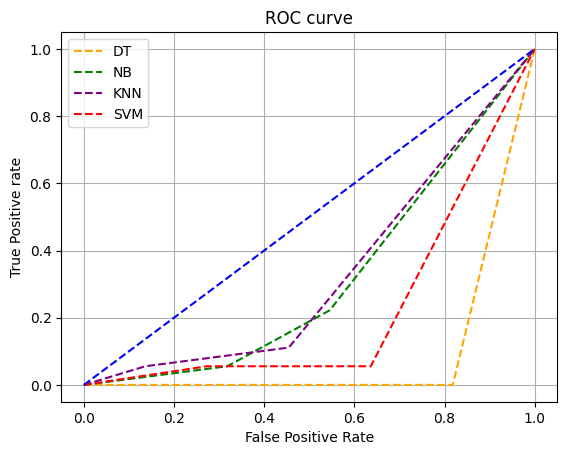

In [28]:
from IPython import display
from base64 import b64decode
# matplotlib

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='DT')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='NB')
plt.plot(fpr3, tpr3, linestyle='--',color='purple', label='KNN')
plt.plot(fpr4, tpr4, linestyle='--',color='red', label='SVM')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.grid()
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [29]:
#Experiment with the SVM algorithm introduced in this lab to predict the class of the tae data (tae.csv). Use default parameter configurations.

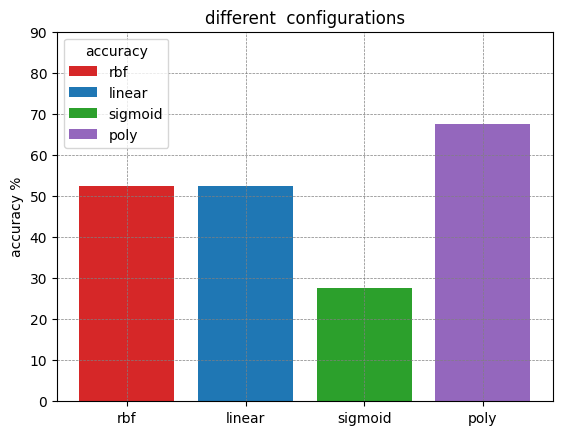

In [30]:
rbf= SVC(random_state = 0, C=50, kernel='linear', gamma = 0.005,probability=True)
rbf.fit(x_train, y_train)
rbf = rbf.predict(x_test)
rbf = metrics.accuracy_score(y_test,rbf)

linear= SVC(random_state = 0, C=50, kernel='linear', gamma = 0.005,probability=True)
linear.fit(x_train, y_train)
linear = linear.predict(x_test)
linear = metrics.accuracy_score(y_test,linear)

sigmoid= SVC(random_state = 0, C=50, kernel='sigmoid', gamma = 0.005,probability=True)
sigmoid.fit(x_train, y_train)
sigmoid = sigmoid.predict(x_test)
sigmoid = metrics.accuracy_score(y_test,sigmoid)

poly= SVC(random_state = 0, C=50, kernel='poly', gamma = 0.005,probability=True)
poly.fit(x_train, y_train)
poly = poly.predict(x_test)
poly = metrics.accuracy_score(y_test,poly)

fig, ax = plt.subplots()

different = ['rbf', 'linear', 'sigmoid','poly']
counts = [rbf*100 , linear*100 , sigmoid*100 , poly*100]
bar_labels = ['rbf', 'linear', 'sigmoid','poly']
bar_colors = ['tab:red', 'tab:blue', 'tab:green','tab:purple']

ax.bar(different, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('accuracy %')
ax.set_title('different  configurations')
ax.legend(title='accuracy')
plt.ylim(0,90)
plt.grid(color = 'grey',linestyle = '--', linewidth = 0.5)
plt.show()